In [1]:
import numpy as np
import scipy.stats
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
## ## ## ## ## #### ## ## ## ## ## 
## ## ## ## ## PART 1: ## ## ## ##
## ## ## ## ## #### ## ## ## ## ## 

#Importing the data

print("\nIMPORTING THE DATA:")
data = np.loadtxt("data.TXT", delimiter=",")

#print(data)


IMPORTING THE DATA:


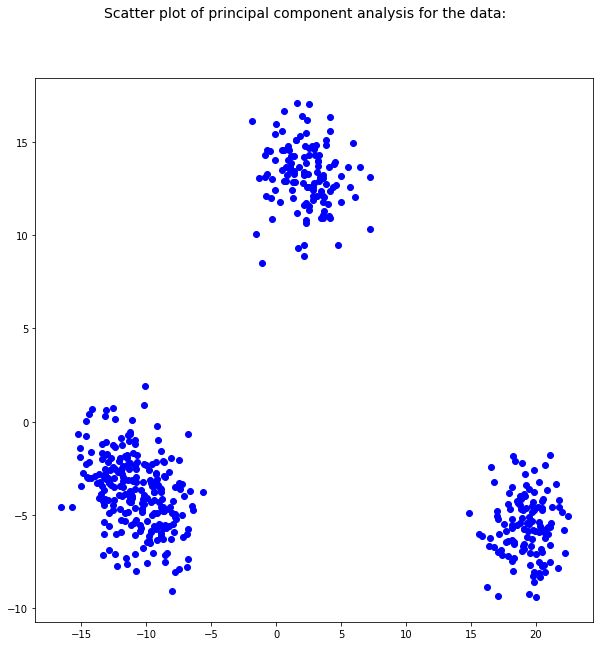

We see 3 distinct clusters.


In [3]:
# Following the example of https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

pca = PCA(n_components = 2)
pca.fit(data)
dataPCAd2 = pca.transform(data)

#print(dataPCAd2)
plt.figure( figsize=(10, 10) )

plt.scatter( dataPCAd2.T[0], dataPCAd2.T[1], color='blue' ) 
plt.suptitle('Scatter plot of principal component analysis for the data:', fontsize=14)
plt.show()
print("We see 3 distinct clusters.")

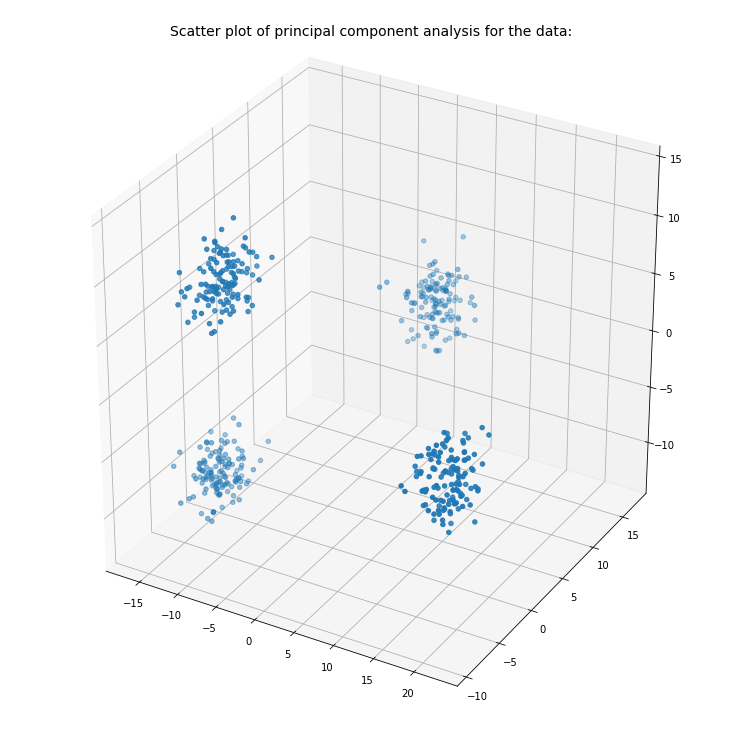

In [4]:
# Following the example of https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

pca3 = PCA(n_components = 3)
pca3.fit(data)
dataPCAd3 = pca3.transform(data)

#print(dataPCAd2)

fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig)#, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter( dataPCAd3.T[0], dataPCAd3.T[1], dataPCAd3.T[2])
plt.suptitle('Scatter plot of principal component analysis for the data:', fontsize=14)

plt.show()

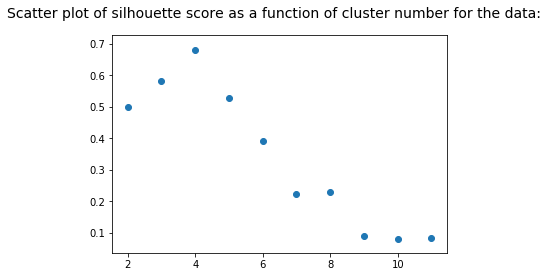

We see, that for 4 clusters the silhouette score has its highest value.


In [6]:
## ## ## ## ## #### ## ## ## ## ## 
## ## ## ## ## PART 2: ## ## ## ##
## ## ## ## ## #### ## ## ## ## ## 

# Nice explanation of the K-means clustering: https://mubaris.com/posts/kmeans-clustering/
numberOfSilhValues = 10#len(data) - 2

silhScores = []
xAx = list( range( 2, numberOfSilhValues + 2 ) )

for n in range(numberOfSilhValues):

    n_clusters = n + 2   

    clusterer = KMeans(n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    silhScores = silhScores + [silhouette_avg]
    
plt.scatter(x = xAx, y = silhScores) 
plt.suptitle('Scatter plot of silhouette score as a function of cluster number for the data:', fontsize=14)
plt.show()

print("We see, that for 4 clusters the silhouette score has its highest value.")

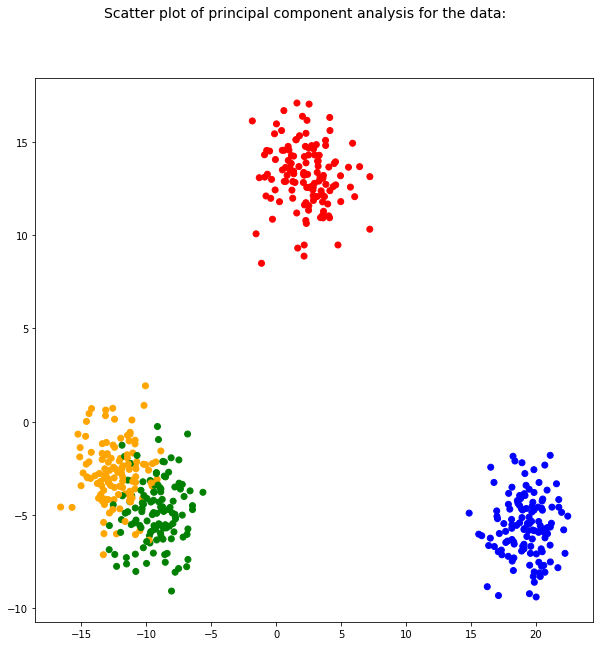

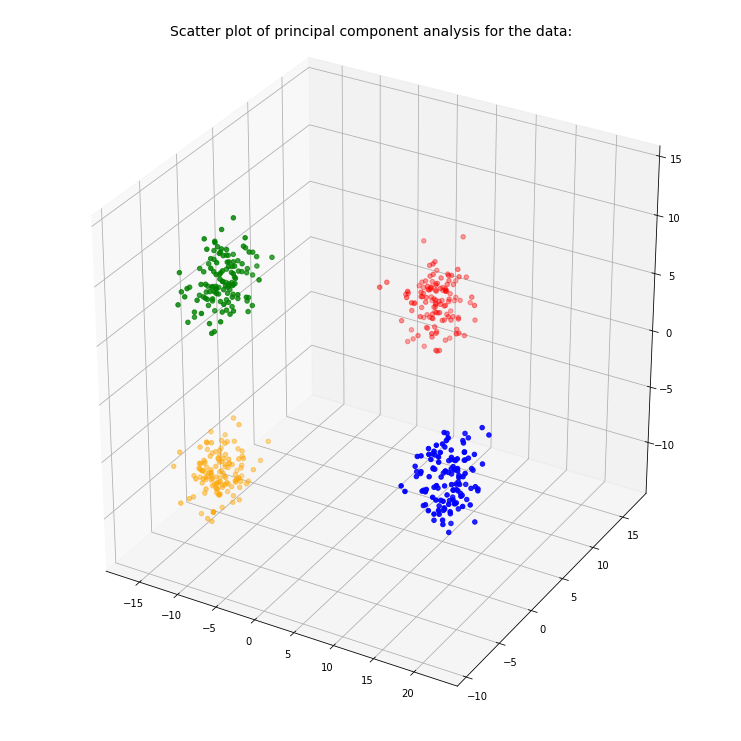

Now we see, that there are four clusters. This is backed by the observation in the 3D PCA plot, where we clearly see four dictinct clusters, so there really are four clusters.


In [7]:
kMeans = KMeans(n_clusters = 4).fit(data)

klustIndices = kMeans.labels_
klustCenters = kMeans.cluster_centers_
#print( klustIndices )

colorList = ['orange','blue','red','green']
colorList2 = []

for i in range( len( klustIndices ) ):
    colorList2 = colorList2 + [ colorList[klustIndices[i]] ]

pca = PCA(n_components = 2)
pca.fit(data)
dataPCAd2 = pca.transform(data)


plt.figure( figsize=(10, 10) )

plt.scatter( dataPCAd2.T[0], dataPCAd2.T[1], color = colorList2 ) 
plt.suptitle('Scatter plot of principal component analysis for the data:', fontsize=14)
plt.show()

fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig)#, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter( dataPCAd3.T[0], dataPCAd3.T[1], dataPCAd3.T[2], color = colorList2 )
plt.suptitle('Scatter plot of principal component analysis for the data:', fontsize=14)

plt.show()

print("Now we see, that there are four clusters. This is backed by the observation in the 3D PCA plot, where we clearly see four dictinct clusters, so there really are four clusters.")

In [8]:
## ## ## ## ## #### ## ## ## ## ## 
## ## ## ## ## PART 3: ## ## ## ##
## ## ## ## ## #### ## ## ## ## ## 

print("IMPORTING THE IRIS DATA:")

# Iris data from  http://archive.ics.uci.edu/ml/datasets/Iris
#
# Attribute Information:
# 0. sepal length in cm
# 1. sepal width in cm
# 2. petal length in cm
# 3. petal width in cm
# 4. class/species: Iris Setosa, Iris Versicolour, Iris Virginica

irisData=np.loadtxt("iris.data", dtype=str, delimiter=",")
#print(irisData)

## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## 

#print("\nEXTRACTING THE DATA OF THE TOTAL SET:")

irisTotal = [];

for i in range( 0,len(irisData) ):
    irisTotal.append(irisData[i][0:4]);

irisTotal = np.array(irisTotal,dtype = float); 

## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## 

#print("\nEXTRACTING THE DATA OF SETOSA:")

setosa = [];

for i in range( 0,len(irisData) ):
    if 'Iris-setosa' in irisData[i]:
        setosa.append(irisData[i][0:4]);

setosa = np.array(setosa,dtype = float);        
        
#print(setosa)

## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## 

#print("\nEXTRACTING THE DATA OF VERSICOLOR:")

versicolor = [];

for i in range( 0,len(irisData) ):
    if 'Iris-versicolor' in irisData[i]:
        versicolor.append(irisData[i][0:4]);

versicolor = np.array(versicolor,dtype = float);        
        
#print(versicolor)

## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## ## 

#print("\nEXTRACTING THE DATA OF VIRGINICA:")

virginica = [];

for i in range( 0,len(irisData) ):
    if 'Iris-virginica' in irisData[i]:
        virginica.append(irisData[i][0:4]);

virginica = np.array(virginica,dtype = float);        
        
#print(virginica)

IMPORTING THE IRIS DATA:


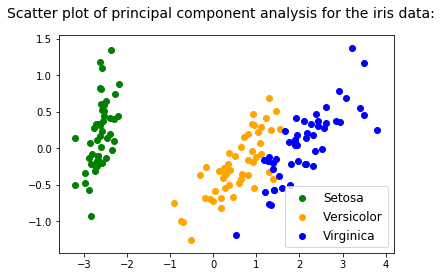

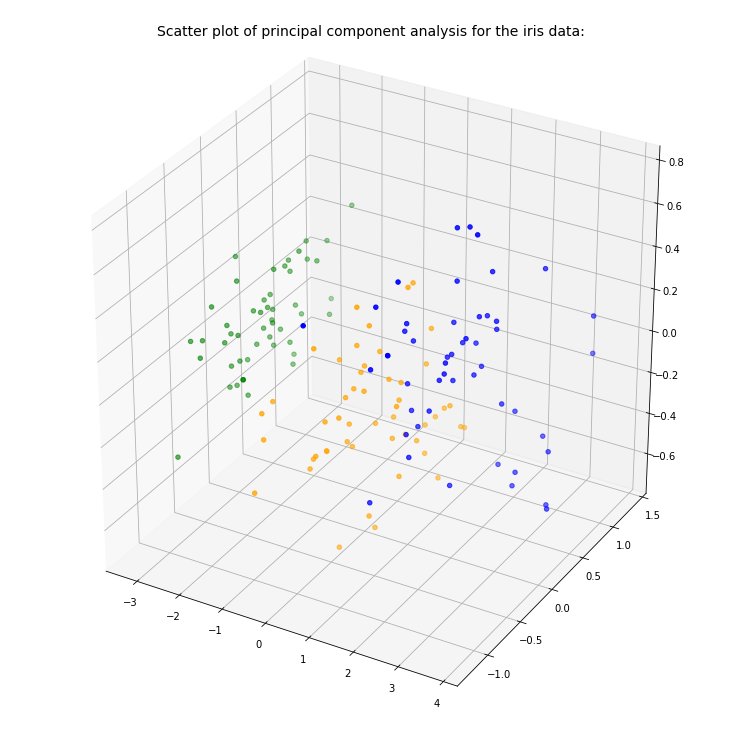

In [9]:
pca = PCA(n_components = 2)
pca.fit(irisTotal)
irisDataPCAd2 = pca.transform(irisTotal)

legendSize = 12
    
plt.scatter( irisDataPCAd2.T[0][0:len(setosa)], irisDataPCAd2.T[1][0:len(setosa)], color='green', label = 'Setosa' )
plt.scatter( irisDataPCAd2.T[0][len(setosa) :len(setosa)  + len(versicolor)], irisDataPCAd2.T[1][len(setosa) :len(setosa)  + len(versicolor)], color='orange', label = 'Versicolor' )
plt.scatter( irisDataPCAd2.T[0][len(setosa)  + len(versicolor):len(irisTotal)], irisDataPCAd2.T[1][len(setosa)  + len(versicolor):len(irisTotal)], color='blue', label = 'Virginica' )
plt.suptitle('Scatter plot of principal component analysis for the iris data:', fontsize=14)
plt.legend(prop={'size': legendSize})
plt.show()

colorList = []
labelList = []

for i in range( len(setosa) ):
    colorList = colorList + ['green']
    
for i in range( len(versicolor) ):
    colorList = colorList + ['orange']

for i in range( len(virginica) ):
    colorList = colorList + ['blue']

#plt.scatter( irisDataPCAd2.T[0], irisDataPCAd2.T[1], color = colorList )
#plt.legend(prop={'size': legendSize})
#plt.show()

pca3 = PCA(n_components = 3)
pca3.fit(irisTotal)
irisDataPCAd3 = pca3.transform(irisTotal)
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig)#, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter( irisDataPCAd3.T[0], irisDataPCAd3.T[1], irisDataPCAd3.T[2], color = colorList)
plt.suptitle('Scatter plot of principal component analysis for the iris data:', fontsize=14)


plt.show()

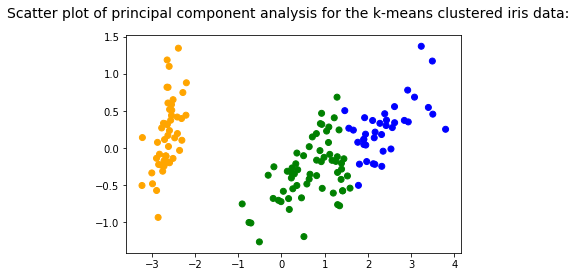

By comparing the clusters created with the actual species and the k-means clustering, we see that setosa cluster is the same in both, but some of the versicolor flowers are in the virginica cluster and vice versa.


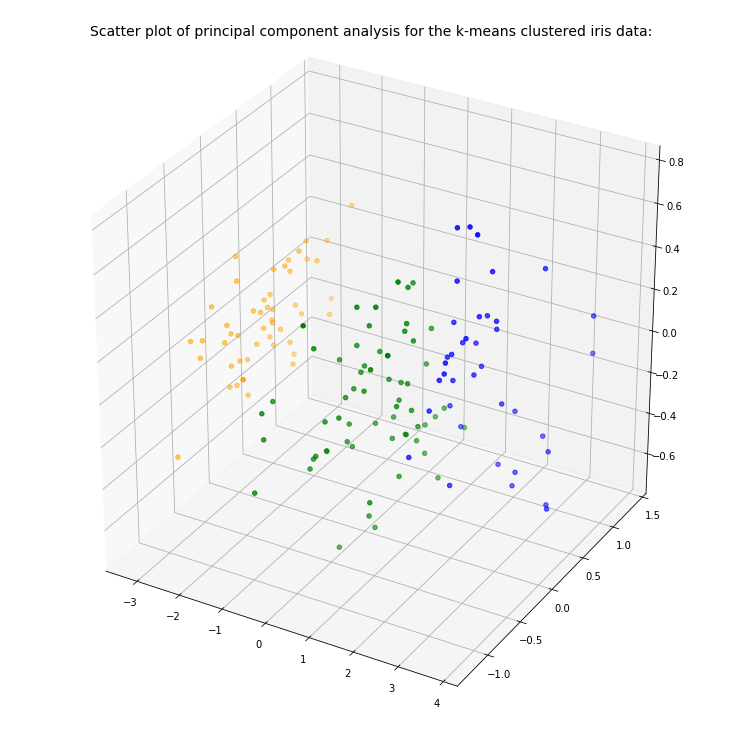

In [11]:
kMeans = KMeans(n_clusters = 3).fit(irisTotal)

klustIndices = kMeans.labels_
klustCenters = kMeans.cluster_centers_

colorList = ['green', 'orange', 'blue']
colorList2 = []

for i in range( len( klustIndices ) ):
    colorList2 = colorList2 + [ colorList[klustIndices[i]] ]


#plt.figure( figsize=(10, 10) )
plt.scatter( irisDataPCAd2.T[0], irisDataPCAd2.T[1], color = colorList2 ) 
plt.suptitle('Scatter plot of principal component analysis for the k-means clustered iris data:', fontsize=14)
plt.show()

print("By comparing the clusters created with the actual species and the k-means \
clustering, we see that setosa cluster is the same in both, but some of the \
versicolor flowers are in the virginica cluster and vice versa.")

fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig)#, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter( irisDataPCAd3.T[0], irisDataPCAd3.T[1], irisDataPCAd3.T[2], color = colorList2 )
plt.suptitle('Scatter plot of principal component analysis for the k-means clustered iris data:', fontsize=14)

plt.show()

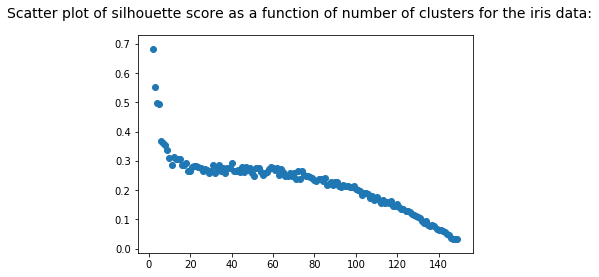

In [72]:
numberOfSilhValues = len(irisTotal) - 2

silhScores = []
xAx = list( range( 2, numberOfSilhValues + 2 ) )

for n in range(numberOfSilhValues):

    n_clusters = n + 2   

    clusterer = KMeans(n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(irisTotal)

    silhouette_avg = silhouette_score(irisTotal, cluster_labels)
    silhScores = silhScores + [silhouette_avg]
    
plt.scatter(x = xAx, y = silhScores) 
plt.suptitle('Scatter plot of silhouette score as a function of number of clusters for the iris data:', fontsize=14)
plt.show()

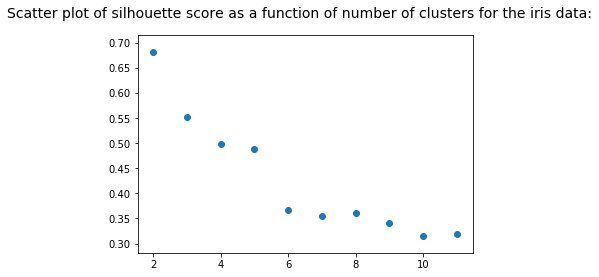

We see that for 2 clusters the silhouette score has its maximal value.


In [12]:
numberOfSilhValues = 10

silhScores = []
xAx = list( range( 2, numberOfSilhValues + 2 ) )

for n in range(numberOfSilhValues):

    n_clusters = n + 2   

    clusterer = KMeans(n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(irisTotal)

    silhouette_avg = silhouette_score(irisTotal, cluster_labels)
    silhScores = silhScores + [silhouette_avg]
    
plt.scatter(x = xAx, y = silhScores) 
plt.suptitle('Scatter plot of silhouette score as a function of number of clusters for the iris data:', fontsize=14)
plt.show()

print("We see that for 2 clusters the silhouette score has its maximal value.")

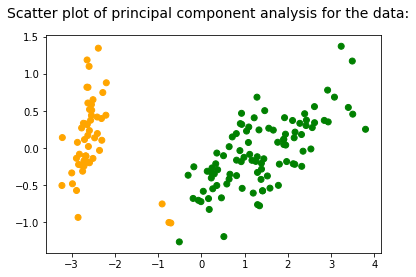

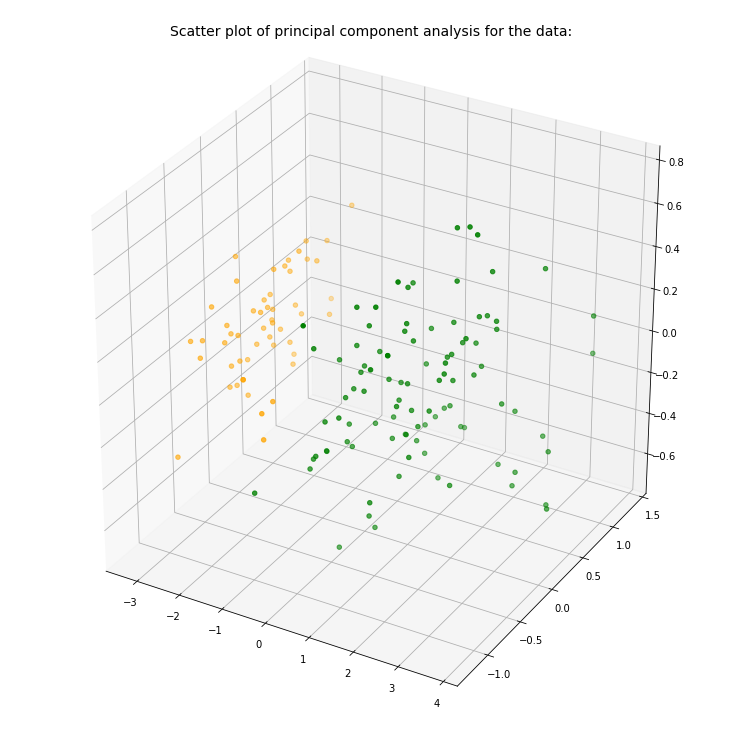

We see, that now the setosa cluster contains also a couple of versicolor flowers, but otherwise is the same as the correct species labels would say. Since the number of clusters is reduced from the original three to two, now virginica and most of the versicolor flowers are in the same cluster. To conclude, the k-means clustering with two clusters preserves quite well the structure of the setosa cluster, but combines the virginica and versicolor clusters into one.


In [13]:
kMeans = KMeans(n_clusters = 2).fit(irisTotal)

klustIndices = kMeans.labels_
klustCenters = kMeans.cluster_centers_

colorList = ['green', 'orange', 'blue']
colorList2 = []

for i in range( len( klustIndices ) ):
    colorList2 = colorList2 + [ colorList[klustIndices[i]] ]


#plt.figure( figsize=(10, 10) )
plt.scatter( irisDataPCAd2.T[0], irisDataPCAd2.T[1], color = colorList2 ) 
plt.suptitle('Scatter plot of principal component analysis for the data:', fontsize=14)
plt.show()

fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig)#, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter( irisDataPCAd3.T[0], irisDataPCAd3.T[1], irisDataPCAd3.T[2], color = colorList2 )
plt.suptitle('Scatter plot of principal component analysis for the data:', fontsize=14)

plt.show()

print("We see, that now the setosa cluster contains also a couple of versicolor flowers, but otherwise is the same as the correct species labels would say. \
Since the number of clusters is reduced from the original three to two, now virginica and most of the versicolor flowers are in the same cluster. \
To conclude, the k-means clustering with two clusters preserves quite well the structure of the setosa cluster, but combines the virginica and versicolor clusters into one.")